<a href="https://colab.research.google.com/github/haidarhakim/Belajar-Asah/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Adhan_Haidar_Hakim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [5]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pra-pemrosesan data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Library untuk clustering dan evaluasi
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Library untuk menyimpan model
import joblib

# Mengabaikan peringatan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
drive.mount('/content/drive')

path_file_gdrive = '/content/drive/MyDrive/Colab Notebooks/bank_transactions_data_edited.xlsx'
df = pd.read_excel(path_file_gdrive)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)
print("\n" + "="*80 + "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   PreviousTransactionDate  2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [7]:
display(df.describe())

,TransactionAmount,PreviousTransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2511.000000,2509,2519.000000,2511.000000,2516.000000,2510.000000,2513
mean,297.656468,2023-07-05 17:33:20.831805440,44.678444,119.422939,1.121622,5113.438124,2024-11-04 08:09:22.576999424
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.310000,2023-04-03 16:14:34,27.000000,63.000000,1.000000,1504.727500,2024-11-04 08:07:54
50%,211.360000,2023-07-07 17:40:58,45.000000,112.000000,1.000000,4734.110000,2024-11-04 08:09:23
75%,413.105000,2023-10-06 18:44:37,59.000000,161.000000,1.000000,7672.687500,2024-11-04 08:10:54
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.230367,NaN,17.837359,70.078513,0.594469,3897.975861,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

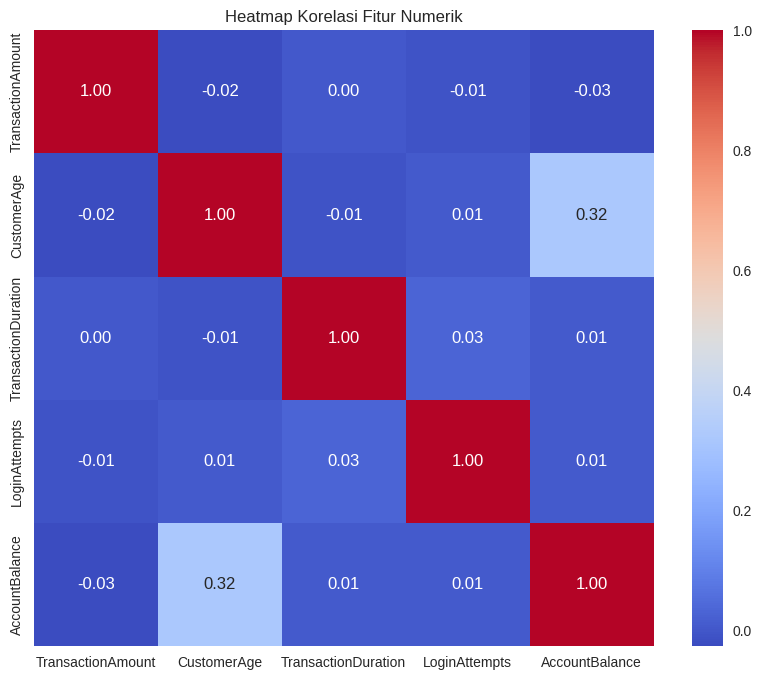

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

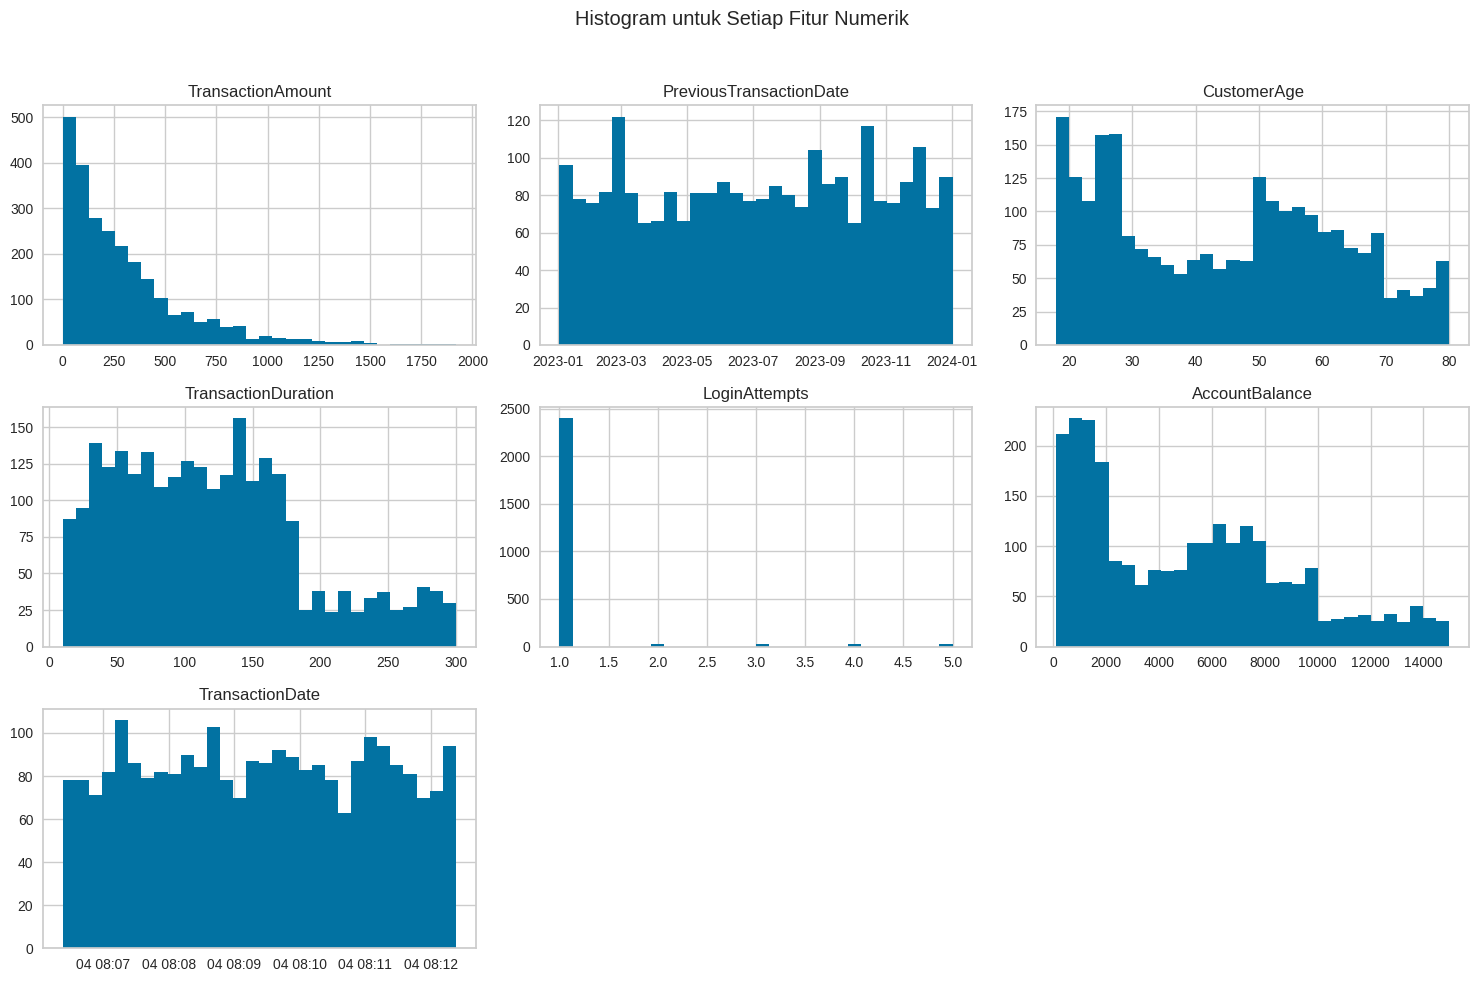

In [9]:
#Histogram tuk semua kolom numerik

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram untuk Setiap Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

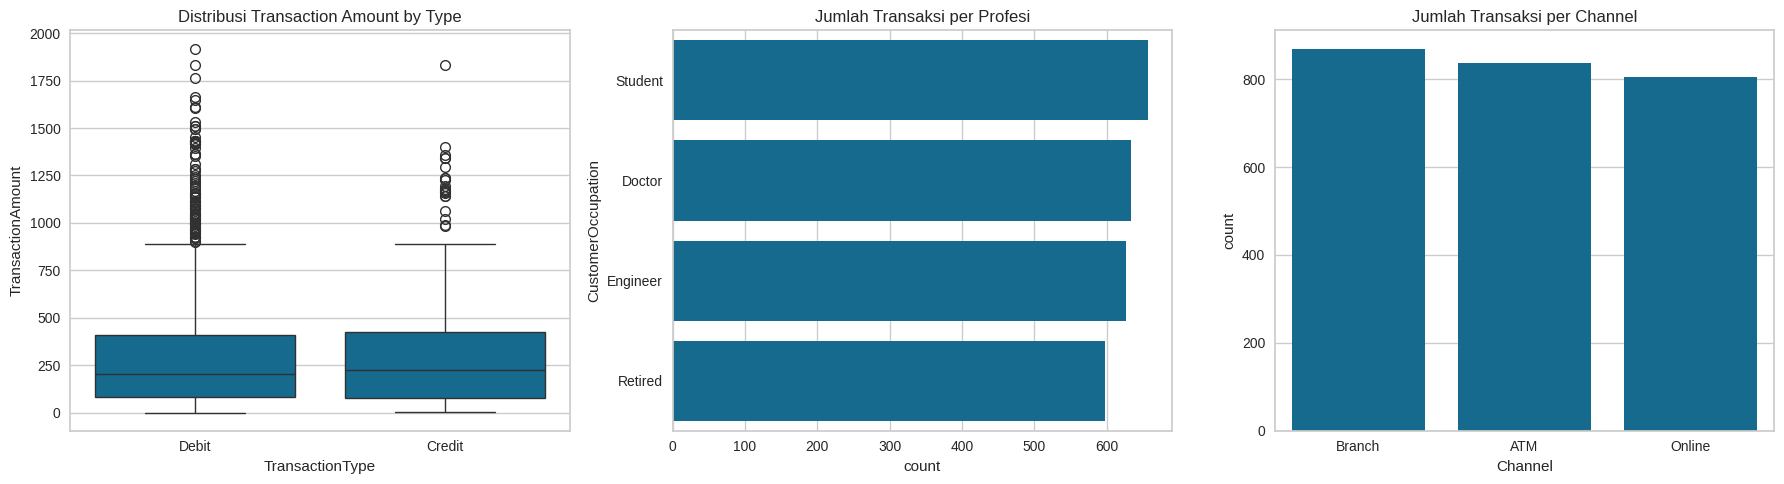

In [10]:
# Visualisasi untuk Fitur Kategorikal
plt.figure(figsize=(18, 5))

# Boxplot TransactionAmount berdasarkan TransactionType
plt.subplot(1, 3, 1)
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Distribusi Transaction Amount by Type')

# Countplot CustomerOccupation
plt.subplot(1, 3, 2)
sns.countplot(y='CustomerOccupation', data=df, order = df['CustomerOccupation'].value_counts().index)
plt.title('Jumlah Transaksi per Profesi')

# Countplot Channel
plt.subplot(1, 3, 3)
sns.countplot(x='Channel', data=df, order = df['Channel'].value_counts().index)
plt.title('Jumlah Transaksi per Channel')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [12]:
df.duplicated().sum()

np.int64(21)

In [13]:

df.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())


Jumlah data duplikat setelah dihapus: 0


In [14]:
# Menangani data yang hilang
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Imputasi untuk kolom numerik dengan median
imputer_numeric = SimpleImputer(strategy='median')
df[numerical_cols] = imputer_numeric.fit_transform(df[numerical_cols])

# Imputasi untuk kolom kategorikal dengan modus
imputer_categoric = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categoric.fit_transform(df[categorical_cols])

# Verifikasi
print("Jumlah nilai null setelah imputasi:")
print(df.isnull().sum())

Jumlah nilai null setelah imputasi:
TransactionID               0
AccountID                   0
TransactionAmount           0
PreviousTransactionDate    28
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
TransactionDate            24
dtype: int64


In [27]:
for col in ['TransactionAmount', 'AccountBalance']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

print("Deskripsi data setelah handling outlier:")
df[['TransactionAmount', 'AccountBalance']].describe()



Deskripsi data setelah handling outlier:


,TransactionAmount,AccountBalance
count,2516.000000,2516.000000
mean,0.315047,0.336914
std,0.277577,0.260593
min,0.000000,0.000000
25%,0.092186,0.095325
50%,0.234811,0.311667
75%,0.455312,0.506814
max,1.000000,1.000000


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.

df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [18]:
bins = [0, 25, 55, 100]
labels = ['Muda', 'Dewasa', 'Lansia']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

# Hapus kolom CustomerAge asli
df.drop('CustomerAge', axis=1, inplace=True)

# Lakukan encode pada hasil binning
le_age_group = LabelEncoder()
df['AgeGroup'] = le_age_group.fit_transform(df['AgeGroup'])

# Tambahkan 'AgeGroup' ke daftar kolom kategorikal untuk di-encode nanti
# Dan hapus 'CustomerAge' dari daftar kolom numerik
print("5 baris pertama setelah binning dan encoding 'AgeGroup':")
df[['AgeGroup']].head()

5 baris pertama setelah binning dan encoding 'AgeGroup':


,AgeGroup
0,1
1,1
2,2
3,0
4,0


In [29]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Lakukan imputasi sekali lagi untuk memastikan tidak ada NaN yang tersisa
final_imputer = SimpleImputer(strategy='median')
df_imputed = final_imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

# --- Langkah 9: Scaling Fitur Numerik ---
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

print("Pembersihan dan pra-pemrosesan selesai. Tidak ada lagi nilai NaN.")
print("5 baris pertama data yang sudah siap:")
df.head()

Pembersihan dan pra-pemrosesan selesai. Tidak ada lagi nilai NaN.
5 baris pertama data yang sudah siap:


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,AgeGroup
0,0.015383,1.0,0.857143,0.0,0.0,0.244828,0.0,0.336832,0.728036,0.5
1,0.418210,1.0,0.357143,0.0,0.0,0.451724,0.0,0.918055,0.516531,0.5
2,0.140186,1.0,0.547619,1.0,1.0,0.158621,0.0,0.068637,0.480647,1.0
3,0.204934,1.0,0.785714,1.0,1.0,0.051724,0.0,0.569198,0.662117,0.0
4,0.014672,0.0,0.023810,1.0,1.0,0.648276,0.0,0.492591,0.211537,0.0


In [21]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=id_cols, inplace=True)
print("Kolom setelah drop ID:")
print(df.columns.tolist())

Kolom setelah drop ID:
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSinceLastTransaction', 'AgeGroup']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [22]:

# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Simpan encoders untuk inverse transform nanti
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le # Simpan encoder

print("5 baris pertama setelah encoding:")
df.head()

5 baris pertama setelah encoding:


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,AgeGroup
0,14.09,1,36,0,0,81.0,1.0,5112.21,13743.648333,1
1,376.24,1,15,0,0,141.0,1.0,13758.91,11895.421111,1
2,126.29,1,23,2,3,56.0,1.0,1122.35,11581.848889,2
3,184.50,1,33,2,3,25.0,1.0,8569.06,13167.615278,0
4,13.45,0,1,2,3,198.0,1.0,7429.40,9230.254167,0


In [23]:


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("5 baris pertama setelah scaling:")
df.head()

5 baris pertama setelah scaling:


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,AgeGroup
0,0.015383,1.0,0.857143,0.0,0.0,0.244828,0.0,0.336832,0.728036,0.5
1,0.418210,1.0,0.357143,0.0,0.0,0.451724,0.0,0.918055,0.516531,0.5
2,0.140186,1.0,0.547619,1.0,1.0,0.158621,0.0,0.068637,0.480647,1.0
3,0.204934,1.0,0.785714,1.0,1.0,0.051724,0.0,0.569198,0.662117,0.0
4,0.014672,0.0,0.023810,1.0,1.0,0.648276,0.0,0.492591,0.211537,0.0


In [30]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TimeSinceLastTransaction',
 'AgeGroup']

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [25]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,AgeGroup
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2464.000000,2516.000000
mean,0.315047,0.776232,0.498363,0.494634,0.507154,0.377494,0.030405,0.336914,0.495194,0.330684
std,0.277577,0.416851,0.290316,0.402120,0.378097,0.240086,0.148617,0.260593,0.292721,0.368691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092186,1.000000,0.261905,0.000000,0.250000,0.182759,0.000000,0.095325,0.239182,0.000000
50%,0.234811,1.000000,0.500000,0.500000,0.666667,0.353448,0.000000,0.311667,0.489042,0.500000
75%,0.455312,1.000000,0.738095,1.000000,1.000000,0.520690,0.000000,0.506814,0.750058,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


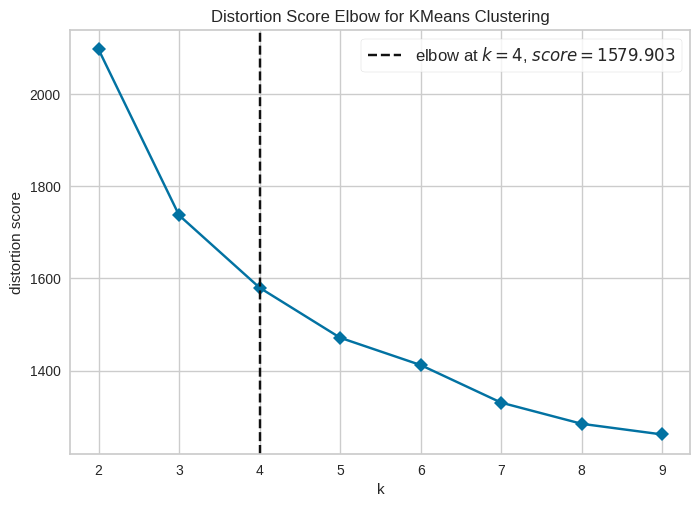

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df)
visualizer.show()



In [32]:
# bikin dan ngelatih model K-Means dengan k terbaik
best_k = 4
model_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
model_kmeans.fit(df)

# Menambahkan label cluster ke dataframe
df['Cluster'] = model_kmeans.labels_
print("Jumlah data di setiap cluster:")
print(df['Cluster'].value_counts())



Jumlah data di setiap cluster:
Cluster
0    740
2    723
3    563
1    490
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [33]:
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# ngitung dan nampilin Silhouette Score
silhouette_avg = silhouette_score(data, cluster_labels_utama)
silhouette_avg

np.float64(0.3209793168095767)

In [34]:
#visualisasi hasil clustering
#sikatt
score = silhouette_score(df.drop('Cluster', axis=1), model_kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1704


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

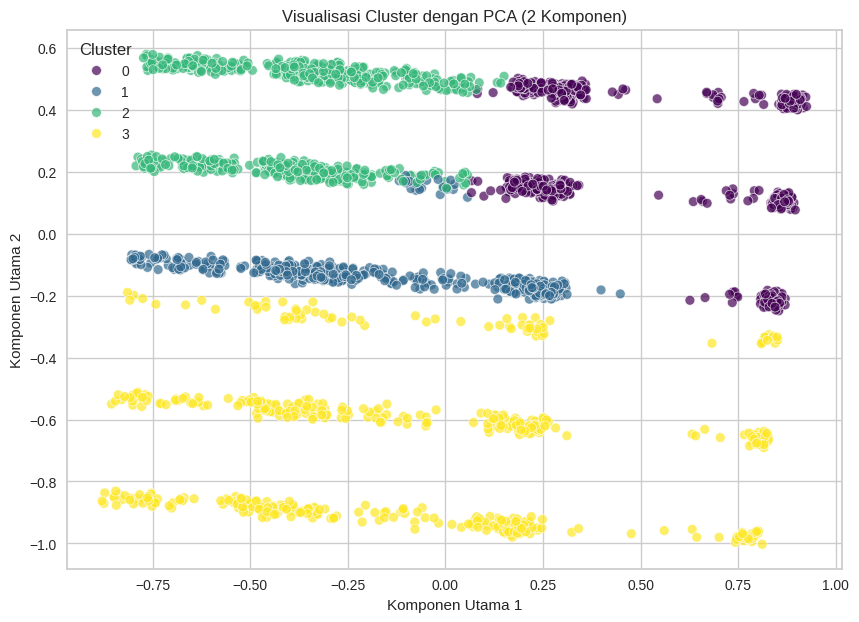

In [35]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('Visualisasi Cluster dengan PCA (2 Komponen)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [36]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
df_pca_final = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Membangun model Kmeans baru dengan data PCA
model_kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
model_kmeans_pca.fit(df_pca_final)

# Simpan model PCA
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
print("Model K-Means dengan data PCA telah dilatih dan disimpan sebagai 'PCA_model_clustering.h5'.")

Model K-Means dengan data PCA telah dilatih dan disimpan sebagai 'PCA_model_clustering.h5'.


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering Sblm Inverse**
1.
- **Cluster 0: (Pengguna ATM & Cabang.)**:
  - **Rata-rata (mean) Transaction Amount:** 0.316
  - **Rata-rata (mean) Chanel:** 0.325 (kadang make atm, kadang transaksi juga di cabang)
  - **Analisis:
  ** Cluster ini ngewakilin nasabah yang secara konsisten melakukan pengeluaran (Debit). Mereka adalah tipe pengguna yang fleksibel, tidak sepenuhnya digital, dan masih mengandalkan kombinasi antara mesin ATM dan layanan kantor cabang untuk kebutuhan transaksi mereka. Nominal transaksinya tidak terlalu besar ataupun kecil, cenderung berada di rata-rata.

  2. **Cluster 1: Pengguna Debit Digital (E-Banking).
    - **Rata-rata (mean) Transaction Amount: 0.321
    - Nilai rata-rata (TransactionType): <1.0>
    semua transaksi debit.
    - rata" Channel: 0.975 mostly beli online

  nasabah yg paling aktif digital (E-Banking). mereka percaya diri dan mapan serta adalah konsumen cerdas yang mampu memanfaatkan teknologi. biasanya cluster ini adalah target tuk produk digital baru.

    3. **Cluster 2: ATM user's
    - **Rata-rata(mean) Transaction Amount: 0.299. paling rendah nominal transaksinya
    - **Rata-rata(mean) Channel: 0.224. sangat bergantung pada barang fisik (ATM)
    nasabah konvensional dan selalu mengandalkan ATM. mostly boomers, tapi ga menutup kemungkinan ke arah segmentase pribadi pekerja lepas dgn pendapatan tidak menentu, ato acapkali melakukan tarik tunai dalam jumlah kecil.


    4. **Cluster 3: Credit user's
     - **Rata-rata(mean) Transaction Amount: 0.327. nilai transaksi tertinggi
    - **Rata-rata(mean) Channel: 0.645. sangat beragam, bisa online bisa juga engga.
    karena fokusnya ke kredit, jadi segmentase target nya adalah owner bisnis, ato professional yg dpt gaji gede/nasabah yg aktif trading ataupun investasi.

In [37]:

analysis_df = df.groupby('Cluster').agg(['mean', 'min', 'max', 'median', 'std'])
analysis_df

TransactionAmount                                    TransactionType  \
                     mean       min  max    median       std            mean   
Cluster                                                                        
0                0.316082  0.000000  1.0  0.233543  0.281287             1.0   
1                0.321456  0.001735  1.0  0.235656  0.277216             1.0   
2                0.299910  0.000067  1.0  0.217158  0.269402             1.0   
3                0.327548  0.001969  1.0  0.244877  0.283133             0.0   

                               ... TimeSinceLastTransaction            \
         min  max median  std  ...                     mean       min   
Cluster                        ...                                      
0        1.0  1.0    1.0  0.0  ...                 0.499942  0.000263   
1        1.0  1.0    1.0  0.0  ...                 0.490229  0.000000   
2        1.0  1.0    1.0  0.0  ...                 0.506429  0.000184   
3        0.0  0.0    0.0  0.0  ...                 0.478279  0.000178   

                                       AgeGroup                             
              max    median       std      mean  min  max median       std  
Cluster                                                                     
0        0.999998  0.489042  0.288516  0.626351  0.0  1.0    0.5  0.373217  
1        0.999996  0.489042  0.287193  0.177551  0.0  0.5    0.0  0.239517  
2        0.999983  0.500053  0.298078  0.141770  0.0  0.5    0.0  0.225514  
3        1.000000  0.475311  0.282235  0.317940  0.0  1.0    0.0  0.358151  

[4 rows x 50 columns]

In [ ]:
print(desc_numeric)

                         mean  min  max
TransactionAmount    0.156357  0.0  1.0
TransactionType      0.773649  0.0  1.0
Location             0.507373  0.0  1.0
DeviceID             0.494190  0.0  1.0
IP Address           0.506254  0.0  1.0
MerchantID           0.492436  0.0  1.0
Channel              0.487331  0.0  1.0
CustomerAge          0.469782  0.0  1.0
CustomerOccupation   0.469970  0.0  1.0
TransactionDuration  0.377516  0.0  1.0
LoginAttempts        0.028012  0.0  1.0
AccountBalance       0.340663  0.0  1.0


In [ ]:
print(desc_categorical)

Empty DataFrame
Columns: []
Index: [3, 6, 8, 9, 10, 11, 12, 13, 15, 17, 18, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 44, 46, 48, 51, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 77, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 118, 119, 121, 123, 124, 126, 127, 128, 129, 130, 132, 133, 134, 135, 137, ...]

[1776 rows x 0 columns]


In [38]:
df_inverse = df.copy()

# Inverse scaling pada kolom numerik
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Inverse encoding pada kolom kategorikal
for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

print("5 baris pertama setelah inverse transform:")
df_inverse.head()

5 baris pertama setelah inverse transform:


,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeSinceLastTransaction,AgeGroup,Cluster
0,0.015383,Debit,Albuquerque,ATM,Doctor,0.244828,0.0,0.336832,0.728036,0.5,2
1,0.418210,Debit,Albuquerque,ATM,Doctor,0.451724,0.0,0.918055,0.516531,0.5,2
2,0.140186,Debit,Albuquerque,Branch,Engineer,0.158621,0.0,0.068637,0.480647,1.0,0
3,0.204934,Debit,Albuquerque,Branch,Engineer,0.051724,0.0,0.569198,0.662117,0.0,1
4,0.014672,Credit,Albuquerque,Branch,Engineer,0.648276,0.0,0.492591,0.211537,0.0,3


In [39]:
numeric_cols_original = df_inverse.select_dtypes(include=np.number).drop('Cluster', axis=1).columns

# Agregasi untuk numerik
agg_numeric = {col: ['mean', 'median', 'min', 'max'] for col in numeric_cols_original}

# Agregasi untuk kategorikal (modus)
agg_categoric = {col: (lambda x: x.mode()[0]) for col in categorical_cols}

# Gabungkan agregasi
agg_all = {**agg_numeric, **agg_categoric}

df_inverse.groupby('Cluster').agg(agg_all)

TransactionAmount                          TransactionDuration  \
                     mean    median       min  max                mean   
Cluster                                                                  
0                0.316082  0.233543  0.000000  1.0            0.380042   
1                0.321456  0.235656  0.001735  1.0            0.374405   
2                0.299910  0.217158  0.000067  1.0            0.379880   
3                0.327548  0.244877  0.001969  1.0            0.373770   

                                      LoginAttempts         ...  \
           median       min       max          mean median  ...   
Cluster                                                     ...   
0        0.363793  0.003448  0.996552      0.027027    0.0  ...   
1        0.350000  0.000000  1.000000      0.027551    0.0  ...   
2        0.353448  0.000000  1.000000      0.031120    0.0  ...   
3        0.341379  0.000000  0.979310      0.036412    0.0  ...   

        TimeSinceLastTransaction            AgeGroup                   \
                             min       max      mean median  min  max   
Cluster                                                                 
0                       0.000263  0.999998  0.626351    0.5  0.0  1.0   
1                       0.000000  0.999996  0.177551    0.0  0.0  0.5   
2                       0.000184  0.999983  0.141770    0.0  0.0  0.5   
3                       0.000178  1.000000  0.317940    0.0  0.0  1.0   

        TransactionType     Location  Channel CustomerOccupation  
               <lambda>     <lambda> <lambda>           <lambda>  
Cluster                                                           
0                 Debit  Albuquerque      ATM           Engineer  
1                 Debit  Albuquerque   Branch             Doctor  
2                 Debit  Albuquerque      ATM             Doctor  
3                Credit  Albuquerque      ATM             Doctor  

[4 rows x 28 columns]

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [40]:
# Simpan Data
df.rename(columns={'Cluster': 'Target'}, inplace=True)

# Simpan Data
df.to_csv('data_clustering.csv', index=False)
print("File 'data_clustering.csv' berhasil disimpan.")

File 'data_clustering.csv' berhasil disimpan.


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

File 'data_clustering_inverse.csv' berhasil disimpan.


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya. mau nyoba narasi baru
1. **Cluster 0: (Yg biasa Transaksi saldo rendah)
- ttp transaksi dengan nominal yg cukup, tapi hanya cukup tuk sehari" dan blm sepenuhnya ngadopsi bank digital.
strategi produk:
- pinjaman makro, kartu kredit entry-level.
 fokus transaksi:
- debit
- campuran (ATM & kantor cabang)

2. ** Cluster 1: (Orang Kaya)
- fokus ke debit
- mostly belanja online

middle to higher economy, dan bahasanya cukup mapan dan nyaman dengan teknologi. gaya hidup juga modern trus daya beli nya kuat.
strategi:
- kartu kredit premium dan berbasis loyalty reward
- promo e-commerce
- produk investasi digital (reksadana/stockbit)

3. **Cluster 2: campuran kelas lower-middle income
sering nabung, saldo dgn rata" tinggi, tapi sangat hati" belanjanya.
segmentasi strategi:
- produk asuransi proteksi
- deposito berjangka

4. cluster 3: si kaya tuh wkwkwk
campuran. rata"nya tinggi di account ballance dan jumlah transaksinya tertinggi di semua cluster (502 dollar)

mereka banyak masuk duit jir, rutin nerima tf. fleksible di duit baik itu masuk dan tf online.
segmentasi strategi:
- biasanya karna kaya bat dan banyak duit masuk, ini jenis nasabah prioritas kaya bca prioritas. jadi kurleb segmentasenya mirip" kaya gitu.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [44]:
df_inverse.rename(columns={'Cluster': 'Target'}, inplace=True)

# Simpan Data hasil inverse
df_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("File 'data_clustering_inverse.csv' berhasil disimpan.")

File 'data_clustering_inverse.csv' berhasil disimpan.


End of Code.